In [2]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("Index_Crimes_by_County_and_Agency__Beginning_1990.csv")

In [4]:
# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

In [5]:
# Drop rows where all values are NaN
df.dropna(how='all', inplace=True)

In [6]:
# Convert 'Year' column to integers, handling any errors
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)


In [7]:
# Fill missing values (optional: here we fill with 0)
df.fillna(0, inplace=True)

In [8]:
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   County          Agency  Year  Months Reported  Index Total  Violent Total  \
0  Albany  Albany City PD  1990              0.0         6635           1052   
1  Albany  Albany City PD  1991              0.0         7569           1201   
2  Albany  Albany City PD  1992              0.0         7791           1150   
3  Albany  Albany City PD  1993              0.0         7802           1238   
4  Albany  Albany City PD  1994              0.0         8648           1380   

   Murder  Rape  Robbery  Aggravated Assault  Property Total  Burglary  \
0       9    82      386                 575            5583      1884   
1      11    71      487                 632            6368      1988   
2       8    77      467                 598            6641      2246   
3       6    59      481                 692            6564      2063   
4      13    79      542                 746            7268      2227   

   Larceny  Motor Vehicle Theft             Region  

In [9]:
# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               23143 non-null  object 
 1   Agency               23143 non-null  object 
 2   Year                 23143 non-null  int64  
 3   Months Reported      23143 non-null  float64
 4   Index Total          23143 non-null  int64  
 5   Violent Total        23143 non-null  int64  
 6   Murder               23143 non-null  int64  
 7   Rape                 23143 non-null  int64  
 8   Robbery              23143 non-null  int64  
 9   Aggravated Assault   23143 non-null  int64  
 10  Property Total       23143 non-null  int64  
 11  Burglary             23143 non-null  int64  
 12  Larceny              23143 non-null  int64  
 13  Motor Vehicle Theft  23143 non-null  int64  
 14  Region               23143 non-null  object 
dtypes: float64(1), int64(11), object(3)


In [20]:
# Show summary statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               Year  Months Reported    Index Total  Violent Total  \
count  23143.000000     23143.000000   23143.000000   23143.000000   
mean    2006.387374         6.916519    1248.749471     196.037679   
std        9.888288         5.904392    7059.720382    1672.512829   
min     1990.000000         0.000000       0.000000       0.000000   
25%     1998.000000         0.000000      29.000000       1.000000   
50%     2006.000000        12.000000     130.000000       9.000000   
75%     2015.000000        12.000000     473.000000      39.000000   
max     2023.000000        12.000000  217786.000000   63087.000000   

             Murder          Rape       Robbery  Aggravated Assault  \
count  23143.000000  23143.000000  23143.000000        23143.000000   
mean       2.040574      9.920754     76.613576          107.462775   
std       18.887724     44.959342    845.512371          799.090468   
min        0.000000      0.000000      0.000000            0.

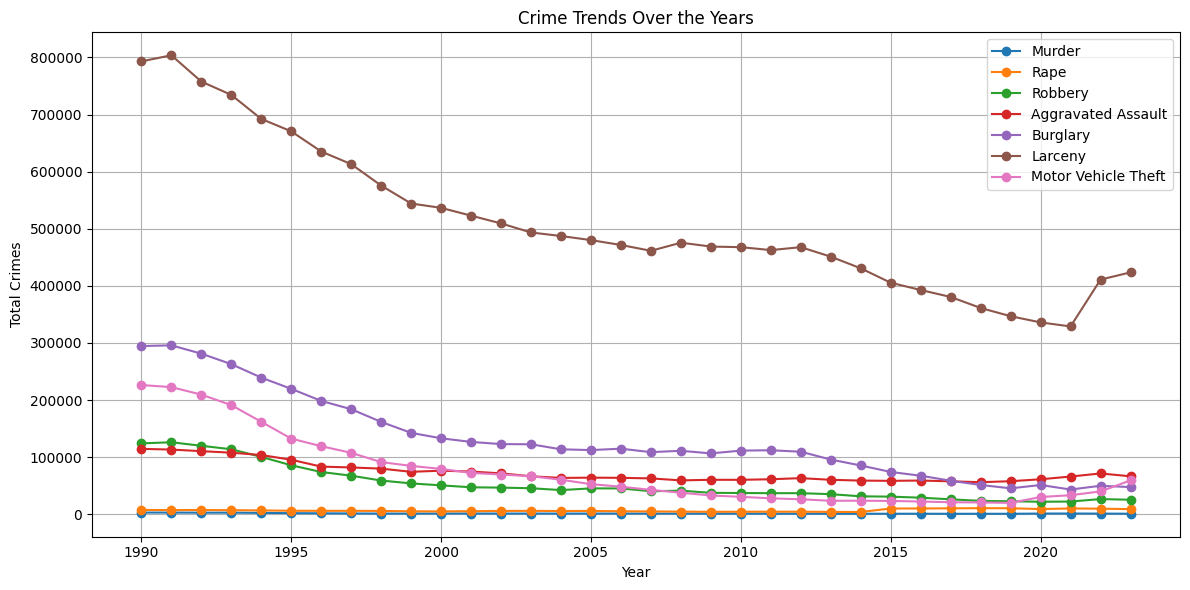

In [15]:
# Line plot of all crimes by year
plt.figure(figsize=(12, 6))

# Group total crimes by year
crime_trend = df.groupby('Year')[crime_cols].sum()

for crime in crime_cols:
    plt.plot(crime_trend.index, crime_trend[crime], marker='o', linestyle='-', label=crime)

plt.title("Crime Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15684\106879282.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Set2")


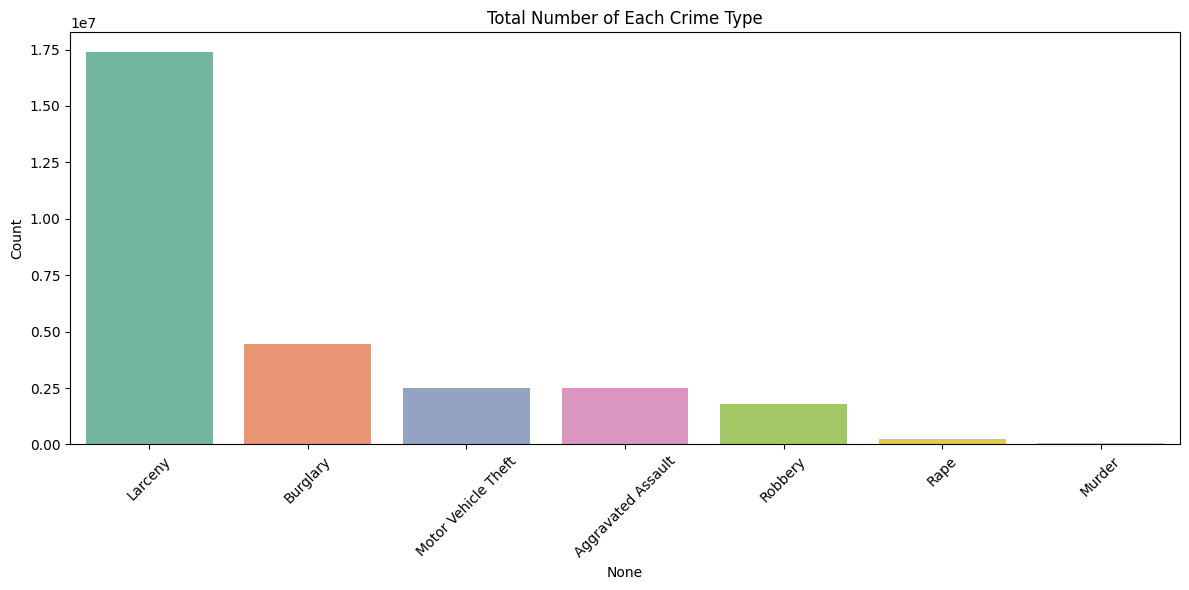

In [22]:
# Plot total number of each crime type (summed over all years/agencies)
crime_cols = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny', 'Motor Vehicle Theft']
crime_totals = df[crime_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=crime_totals.index, y=crime_totals.values, palette="Set2")
plt.title("Total Number of Each Crime Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15684\2885383866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_crimes.index, y=avg_crimes.values, palette='viridis')


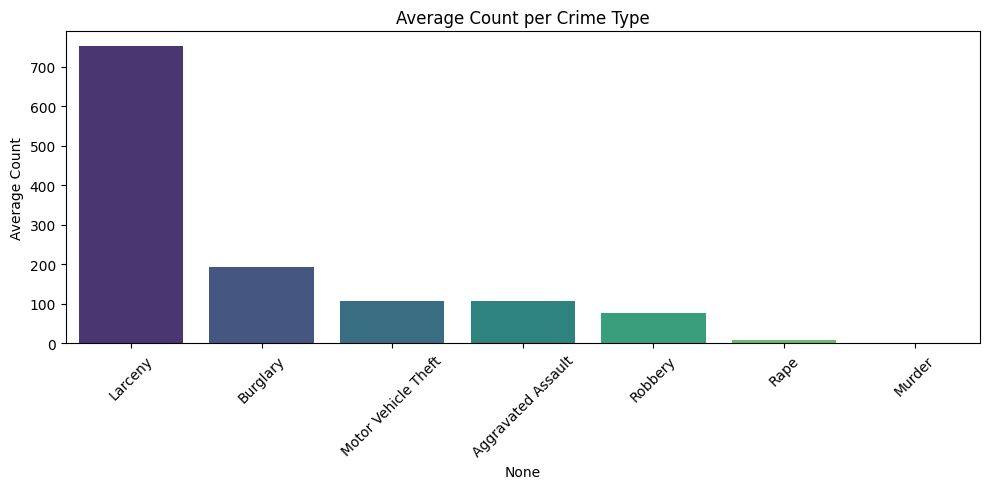

In [33]:
# Average count of each crime across dataset
avg_crimes = df[crime_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_crimes.index, y=avg_crimes.values, palette='viridis')
plt.title("Average Count per Crime Type")
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

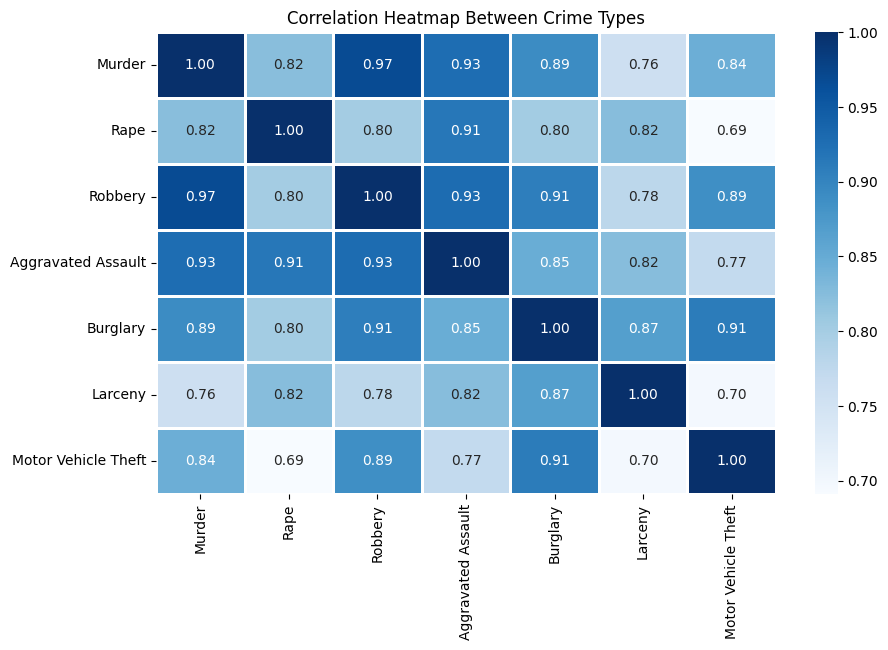

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[crime_cols].corr(), annot=True, cmap="Blues", fmt=".2f",linewidths=0.8)
plt.title("Correlation Heatmap Between Crime Types")
plt.show()

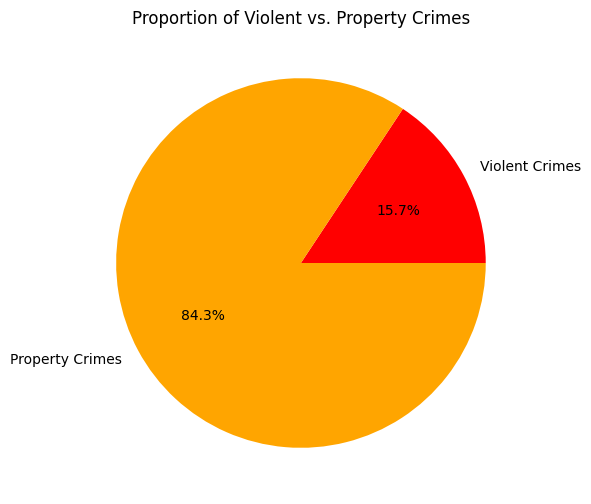

In [13]:
# Pie chart: Violent vs Property Crimes
violent_crimes = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault']
property_crimes = ['Burglary', 'Larceny', 'Motor Vehicle Theft']

violent_total = df[violent_crimes].sum().sum()
property_total = df[property_crimes].sum().sum()

plt.figure(figsize=(6, 6))
plt.pie([violent_total, property_total], labels=["Violent Crimes", "Property Crimes"], autopct='%1.1f%%', colors=["red", "orange"])
plt.title("Proportion of Violent vs. Property Crimes")
plt.show()

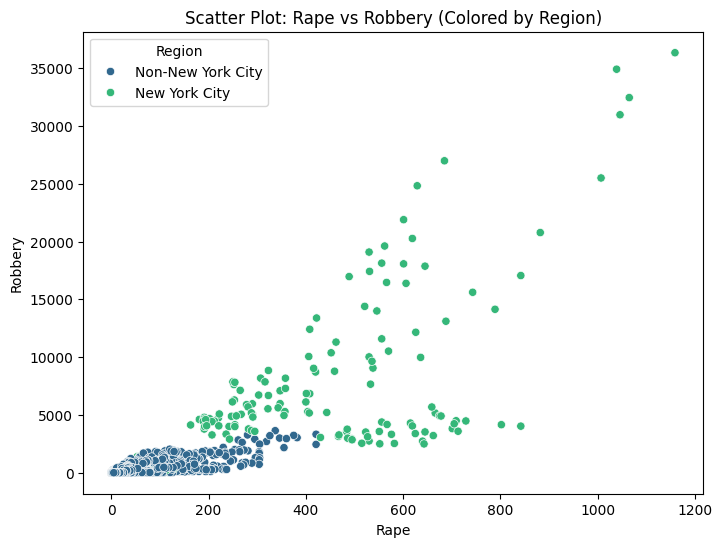

In [17]:
# Scatter plot (example: Rape vs Robbery)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rape', y='Robbery', hue='Region', palette='viridis')
plt.title("Scatter Plot: Rape vs Robbery (Colored by Region)")
plt.xlabel("Rape")
plt.ylabel("Robbery")
plt.show()


Outliers in Murder:
0         9
1        11
2         8
3         6
4        13
         ..
23087     1
23094     1
23103     1
23105     1
23117     1
Name: Murder, Length: 4421, dtype: int64


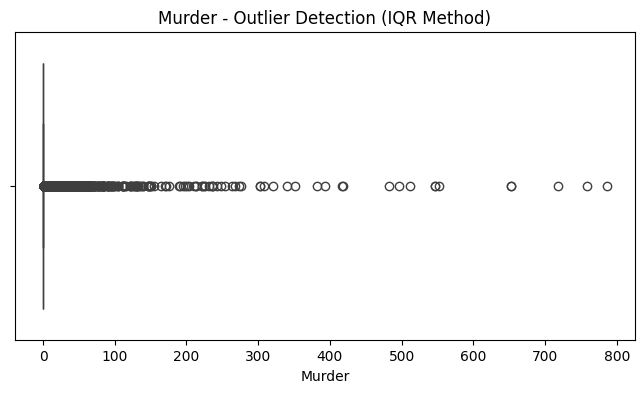

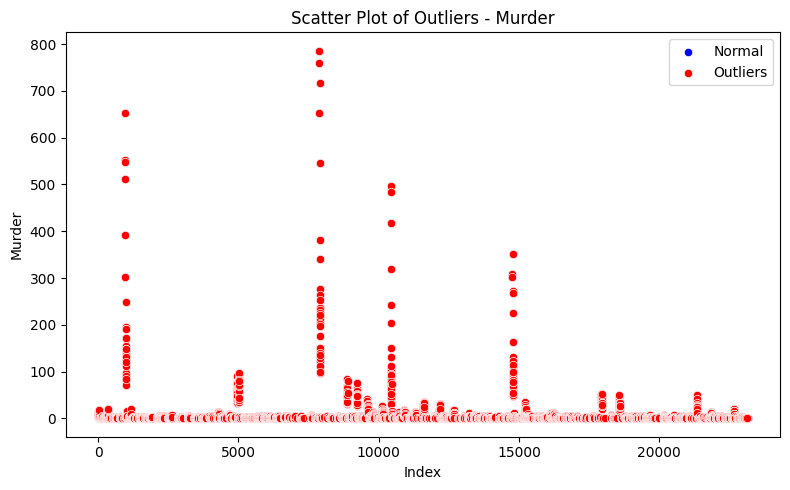


Outliers in Rape:
0        82
1        71
2        77
3        59
4        79
         ..
23019    12
23021    21
23022    18
23023    17
23055    11
Name: Rape, Length: 3451, dtype: int64


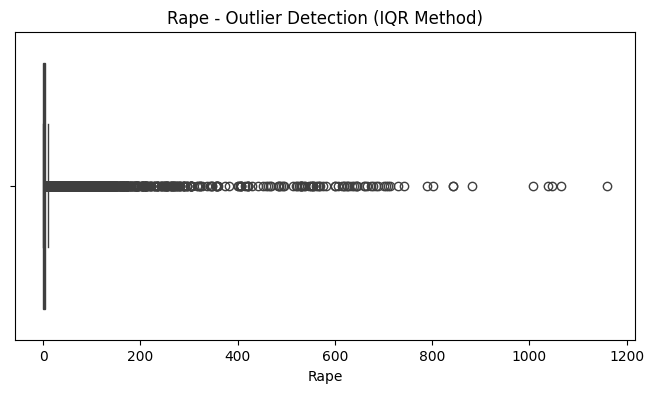

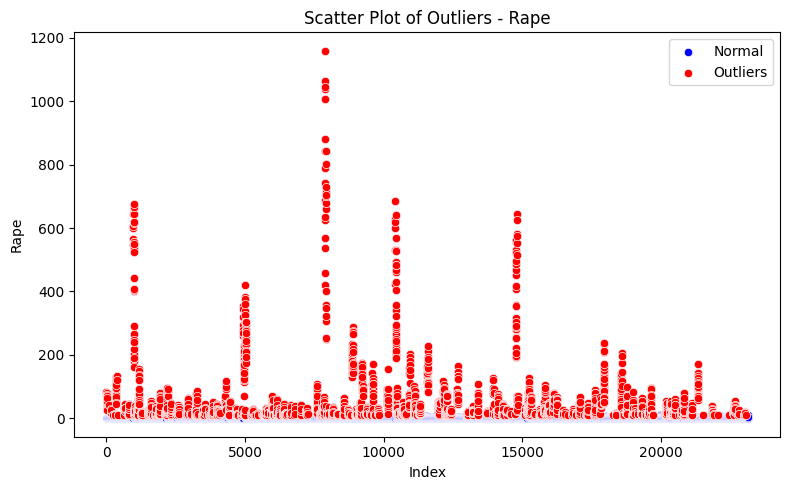


Outliers in Robbery:
0        386
1        487
2        467
3        481
4        542
        ... 
22675    169
22676    150
22677    216
22678    206
22692     13
Name: Robbery, Length: 3281, dtype: int64


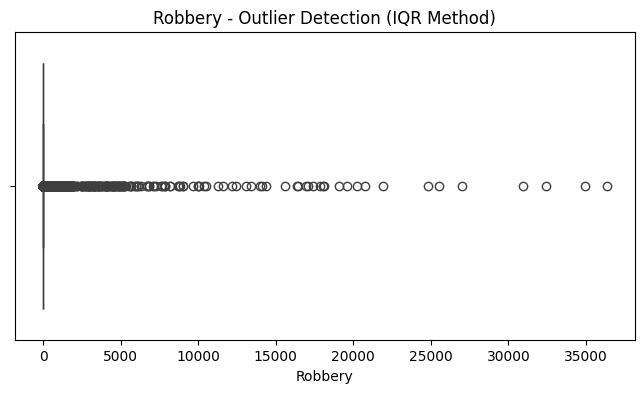

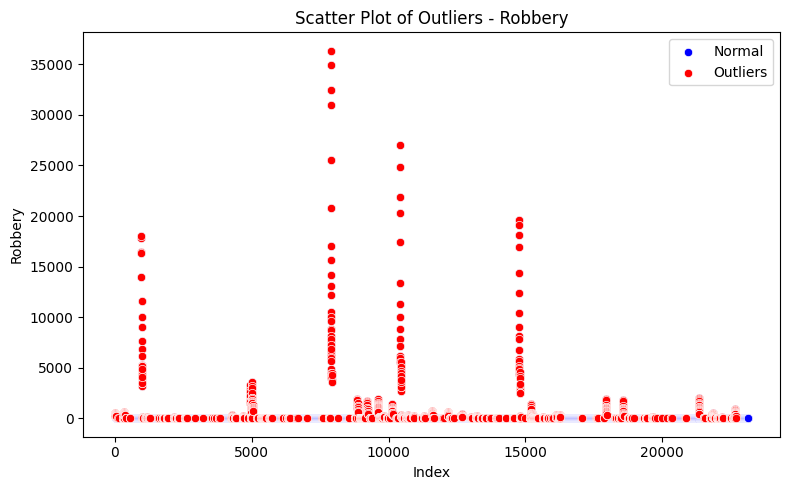


Outliers in Aggravated Assault:
0        575
1        632
2        598
3        692
4        746
        ... 
22924     75
22925     79
22926     71
22956     76
22957     78
Name: Aggravated Assault, Length: 3073, dtype: int64


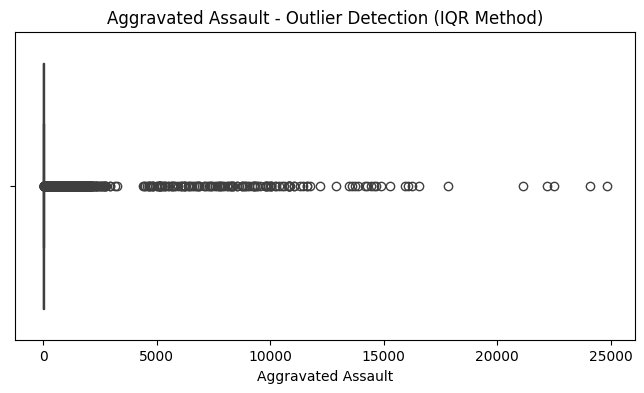

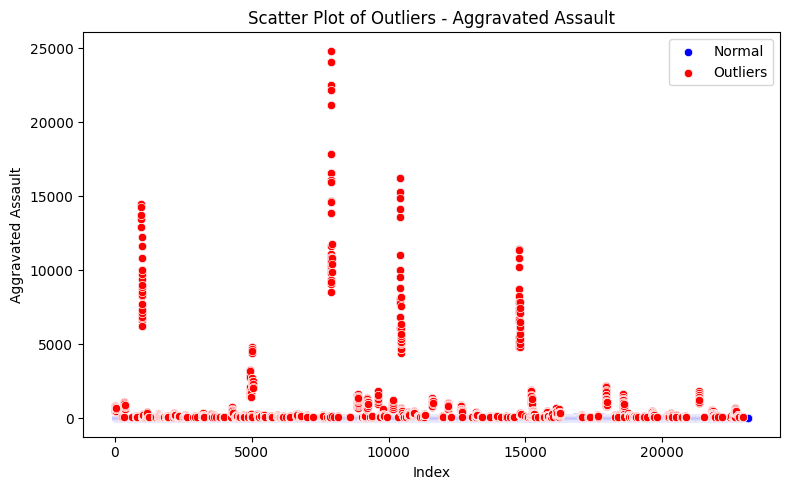


Outliers in Burglary:
0        1884
1        1988
2        2246
3        2063
4        2227
         ... 
22931     297
22932     308
22933     348
22934     368
22935     225
Name: Burglary, Length: 2921, dtype: int64


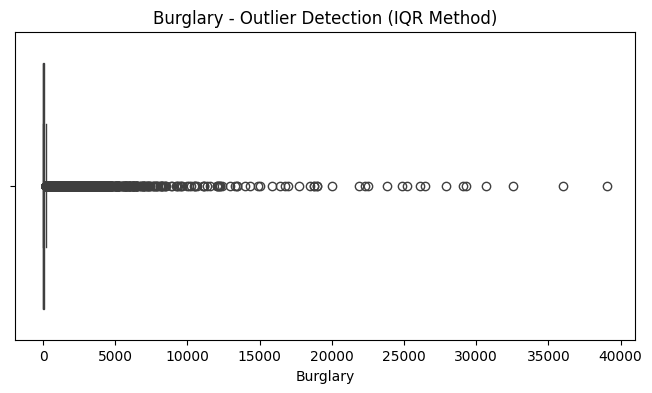

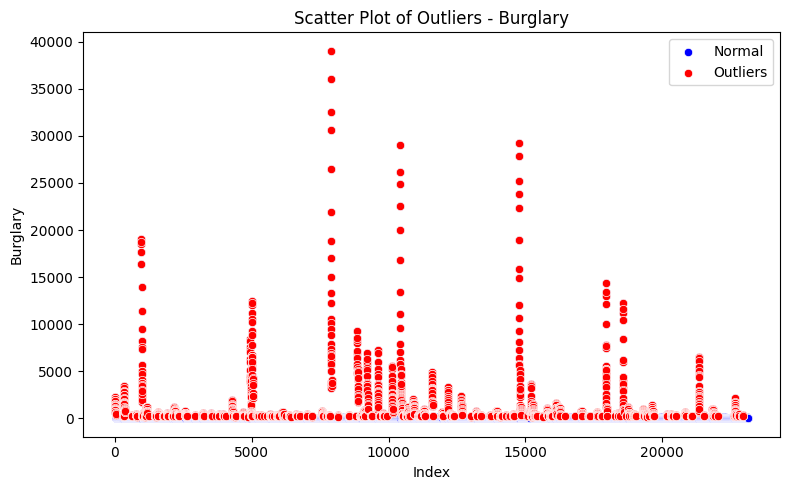


Outliers in Larceny:
0        3264
1        3878
2        3858
3        4030
4        4502
         ... 
22674    1467
22675    1466
22676    1340
22677    1421
22678    1876
Name: Larceny, Length: 2795, dtype: int64


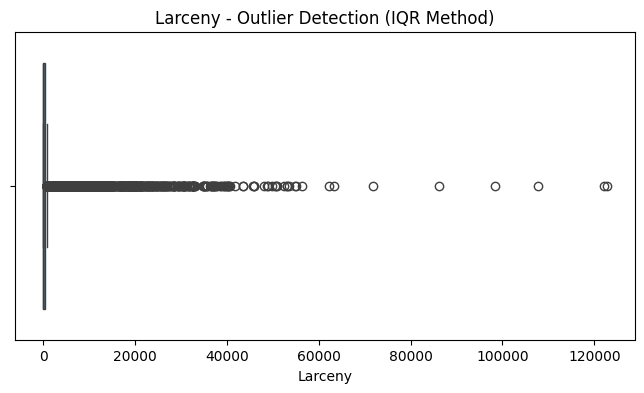

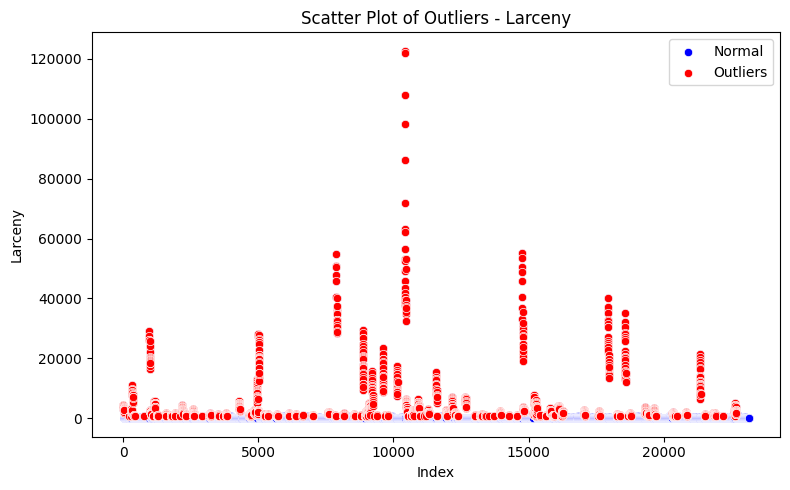


Outliers in Motor Vehicle Theft:
0        435
1        502
2        537
3        471
4        539
        ... 
22678    394
22781     53
22782     46
22783     48
22784     46
Name: Motor Vehicle Theft, Length: 2892, dtype: int64


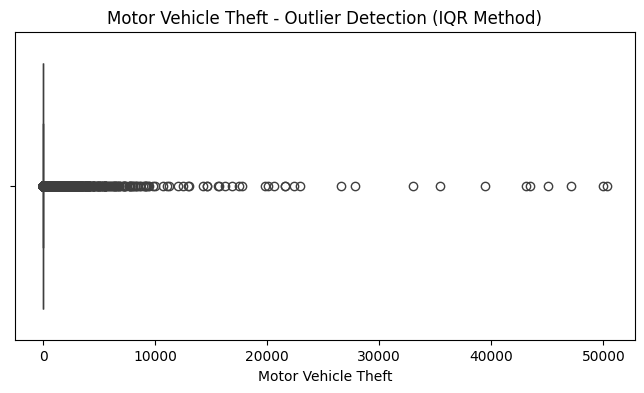

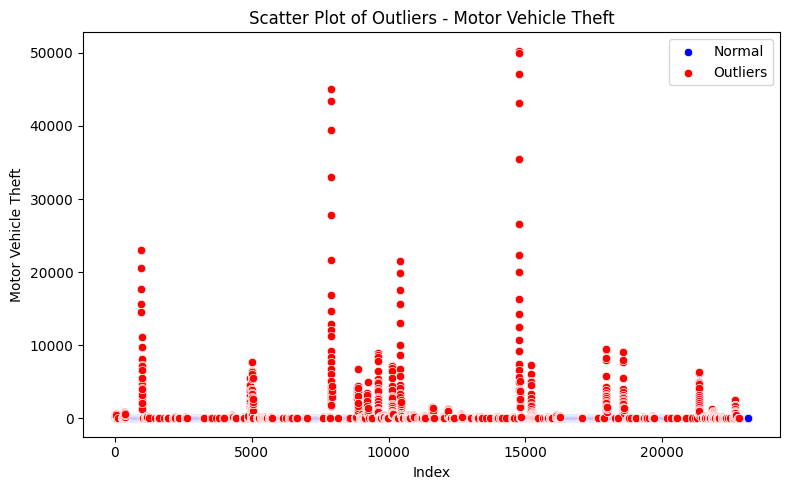

In [32]:
# List of crime columns
crime_cols = ['Murder', 'Rape', 'Robbery', 'Aggravated Assault',
              'Burglary', 'Larceny', 'Motor Vehicle Theft']

# Detect and show outliers using IQR 
for column in crime_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print outliers
    print(f"\nOutliers in {column}:")
    print(outliers[column])

    # Boxplot with outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"{column} - Outlier Detection (IQR Method)")
    plt.show()

    # Scatter plot to show outliers
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df.index, y=df[column], color='blue', label='Normal')
    sns.scatterplot(x=outliers.index, y=outliers[column], color='red', label='Outliers')
    plt.title(f'Scatter Plot of Outliers - {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.tight_layout()
    plt.show()